# Disease Risk Prediction

**Import necessary Libararies**

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,confusion_matrix,classification_report
from sklearn.metrics import RocCurveDisplay
import warnings
warnings.filterwarnings('ignore')

**Explore The Data:**

In [46]:
# read the data
df=pd.read_csv('/content/health_lifestyle_dataset.csv')
df.head()

,id,age,gender,bmi,daily_steps,sleep_hours,water_intake_l,calories_consumed,smoker,alcohol,resting_hr,systolic_bp,diastolic_bp,cholesterol,family_history,disease_risk
0,1,56,Male,20.5,4198,3.9,3.4,1602,0,0,97,161,111,240,0,0
1,2,69,Female,33.3,14359,9.0,4.7,2346,0,1,68,116,65,207,0,0
2,3,46,Male,31.6,1817,6.6,4.2,1643,0,1,90,123,99,296,0,0
3,4,32,Female,38.2,15772,3.6,2.0,2460,0,0,71,165,95,175,0,0
4,5,60,Female,33.6,6037,3.8,4.0,3756,0,1,98,139,61,294,0,0


In [47]:
#print info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 100000 non-null  int64  
 1   age                100000 non-null  int64  
 2   gender             100000 non-null  object 
 3   bmi                100000 non-null  float64
 4   daily_steps        100000 non-null  int64  
 5   sleep_hours        100000 non-null  float64
 6   water_intake_l     100000 non-null  float64
 7   calories_consumed  100000 non-null  int64  
 8   smoker             100000 non-null  int64  
 9   alcohol            100000 non-null  int64  
 10  resting_hr         100000 non-null  int64  
 11  systolic_bp        100000 non-null  int64  
 12  diastolic_bp       100000 non-null  int64  
 13  cholesterol        100000 non-null  int64  
 14  family_history     100000 non-null  int64  
 15  disease_risk       100000 non-null  int64  
dtypes: 

In [48]:
# get sample from the data
df.sample(5)

,id,age,gender,bmi,daily_steps,sleep_hours,water_intake_l,calories_consumed,smoker,alcohol,resting_hr,systolic_bp,diastolic_bp,cholesterol,family_history,disease_risk
29862,29863,55,Male,38.7,16439,7.6,3.6,1932,0,1,63,153,93,239,0,0
14801,14802,40,Female,37.1,12721,6.8,4.3,1742,0,0,81,159,99,194,0,0
75836,75837,52,Male,23.9,6808,3.5,4.8,3064,0,1,52,156,92,172,1,0
91727,91728,50,Male,18.5,13956,6.2,4.3,1555,0,1,80,172,111,234,1,0
17408,17409,48,Male,25.3,15562,9.1,3.7,3831,0,0,90,135,96,206,0,1


In [49]:
# print last 10 rows of the data
df.tail(10)

,id,age,gender,bmi,daily_steps,sleep_hours,water_intake_l,calories_consumed,smoker,alcohol,resting_hr,systolic_bp,diastolic_bp,cholesterol,family_history,disease_risk
99990,99991,53,Male,26.0,16162,6.2,2.4,2374,0,0,94,154,65,271,0,1
99991,99992,25,Male,23.2,8493,8.8,3.7,1385,0,1,66,93,107,268,1,0
99992,99993,44,Female,32.9,6644,7.2,3.9,3193,0,0,78,135,107,236,0,0
99993,99994,23,Male,27.3,3586,6.3,3.8,2089,0,0,65,159,105,175,0,0
99994,99995,41,Male,38.8,4381,7.6,3.6,1466,1,0,89,143,95,219,1,0
99995,99996,53,Male,33.1,4726,3.9,2.0,3118,0,1,56,105,76,282,0,0
99996,99997,22,Male,35.1,11554,4.5,3.1,1967,0,0,51,149,77,192,0,0
99997,99998,37,Male,18.9,3924,3.8,1.0,2328,0,0,69,92,117,218,0,0
99998,99999,72,Female,27.8,16110,5.6,0.8,3093,0,0,93,164,72,188,0,0
99999,100000,37,Male,35.4,8222,9.1,1.8,3942,0,1,71,145,80,276,0,1


Data Quality Check

In [50]:
df.isna().sum()

,0
id,0
age,0
gender,0
bmi,0
daily_steps,0
sleep_hours,0
water_intake_l,0
calories_consumed,0
smoker,0
alcohol,0


In [51]:
df.duplicated().sum()

np.int64(0)

### About Dataset:
- This dataset contains of 16 columns, and 100000 rows and the columns are as follows:

  1. id: Unique identifier for each individual

  2. age: Age of the person

  3. gender:  Gender of the person (Male/Female)

  4. bmi: Body Mass Index (normal: 18.5 to 24.9)

  5. daily_steps: Average number of steps taken per day

  6. sleep_hours: Average sleep duration per day (hours)

  7. water_intake_l: Daily water intake (liters)

  8. calories_consumed: Number of calories consumed per day

  9. smoker: Smoking status of the individual (0 = No, 1 = Yes)

  10. alcohol: Alcohol Consumption of the individual  (0 = No, 1 = Yes)

  11. resting_hr: Resting heart rate -> the heart pumping the number of times needed to deliver blood to the body when you're not exercising (normal range : 60 to 100 bpm)

  12. systolic_bp: Systolic blood pressure -> the first (top/upper) number. It measures the pressure your blood is pushing against your artery walls when the heart beats (normal: 120 and 129)

  13. diastolic_bp: Diastolic blood pressure -> the second (bottom/lower) number. It measures the pressure your blood is pushing against your artery walls while the heart muscle rests between beats (normal: less than 80 mmHg)

  14. cholesterol: Cholesterol level (normal: 200 mg/dL)

  15. family_history: Family history of disease (0 = No, 1 = Yes)

  16. disease_risk: Risk of disease of the individual (target variable)(0 = Low, 1 = High)

In [52]:
df.describe()

,id,age,bmi,daily_steps,sleep_hours,water_intake_l,calories_consumed,smoker,alcohol,resting_hr,systolic_bp,diastolic_bp,cholesterol,family_history,disease_risk
count,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,48.525990,29.024790,10479.87029,6.491784,2.751496,2603.341200,0.200940,0.300020,74.457420,134.58063,89.508850,224.300630,0.299150,0.248210
std,28867.657797,17.886768,6.352666,5483.63236,2.021922,1.297338,807.288563,0.400705,0.458269,14.423715,25.95153,17.347041,43.327749,0.457888,0.431976
min,1.000000,18.000000,18.000000,1000.00000,3.000000,0.500000,1200.000000,0.000000,0.000000,50.000000,90.00000,60.000000,150.000000,0.000000,0.000000
25%,25000.750000,33.000000,23.500000,5729.00000,4.700000,1.600000,1906.000000,0.000000,0.000000,62.000000,112.00000,74.000000,187.000000,0.000000,0.000000
50%,50000.500000,48.000000,29.000000,10468.00000,6.500000,2.800000,2603.000000,0.000000,0.000000,74.000000,135.00000,89.000000,224.000000,0.000000,0.000000
75%,75000.250000,64.000000,34.500000,15229.00000,8.200000,3.900000,3299.000000,0.000000,1.000000,87.000000,157.00000,105.000000,262.000000,1.000000,0.000000
max,100000.000000,79.000000,40.000000,19999.00000,10.000000,5.000000,3999.000000,1.000000,1.000000,99.000000,179.00000,119.000000,299.000000,1.000000,1.000000


The dataset features ranges:

age -> 18-79 years

bmi -> 18-40 kg/m2

daily steps -> 1000-19999 steps

sleep hours -> 3-10 hours

water intake -> 0.5-5 liters

calories consumed -> 1200-3999 calories

resting heart rate -> 50-99

systolic blood pressure -> 90-179

diastolic blood pressure -> 60-119

cholestrol -> 150-299

potential of outliers: these values are realistic and not considered outlier  

In [53]:
df.describe(include='object') # male is more than female in this dataset by a small range

,gender
count,100000
unique,2
top,Male
freq,50132


# EDA

### Univariant analysis

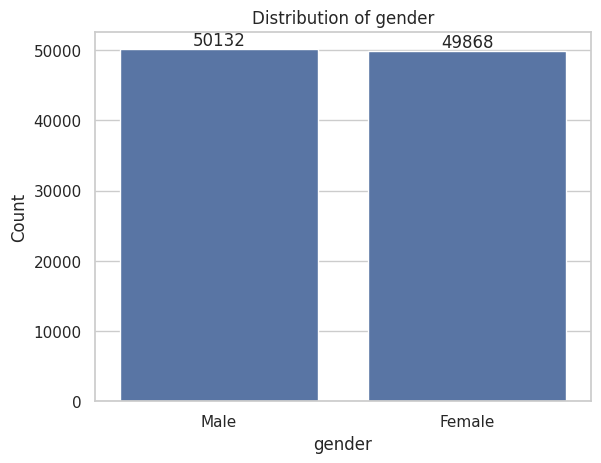

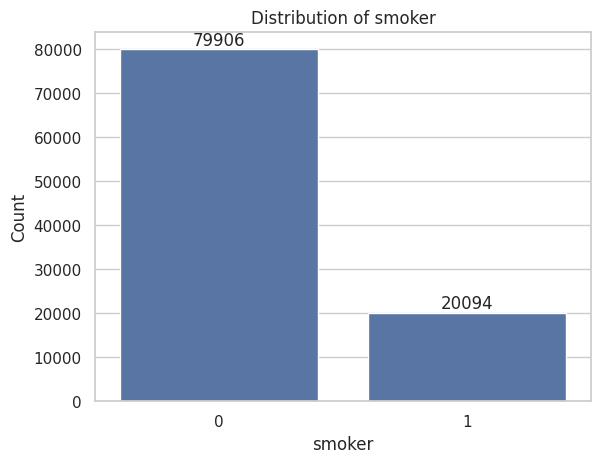

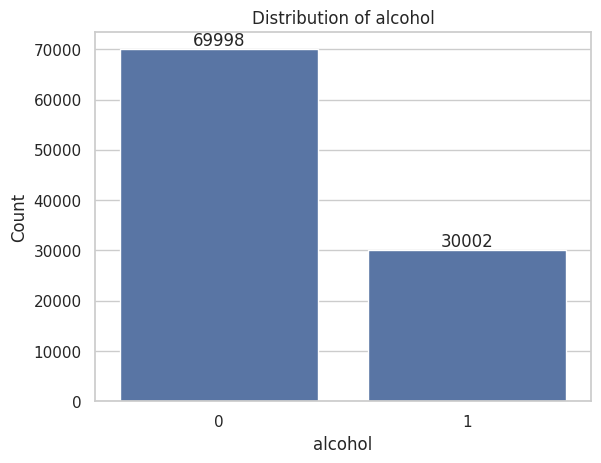

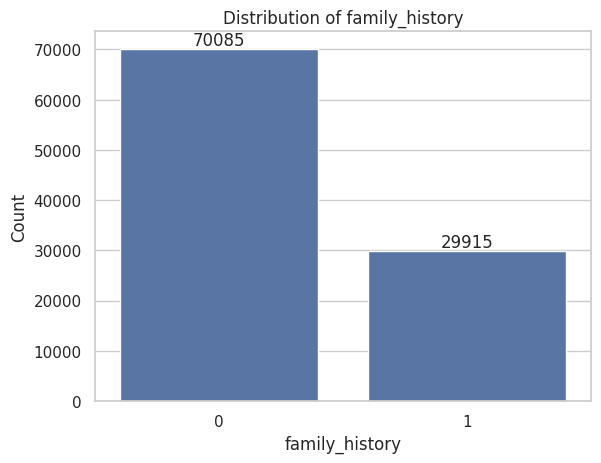

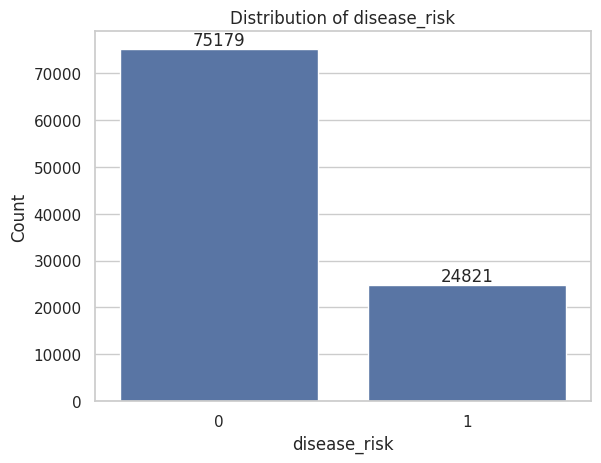

In [54]:
binary_features = ['gender', 'smoker', 'alcohol', 'family_history', 'disease_risk']
for col in binary_features:
    ax = sns.countplot(x=col, data=df)
    for container in ax.containers:
        ax.bar_label(container)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Distribution of {col}')
    plt.show()


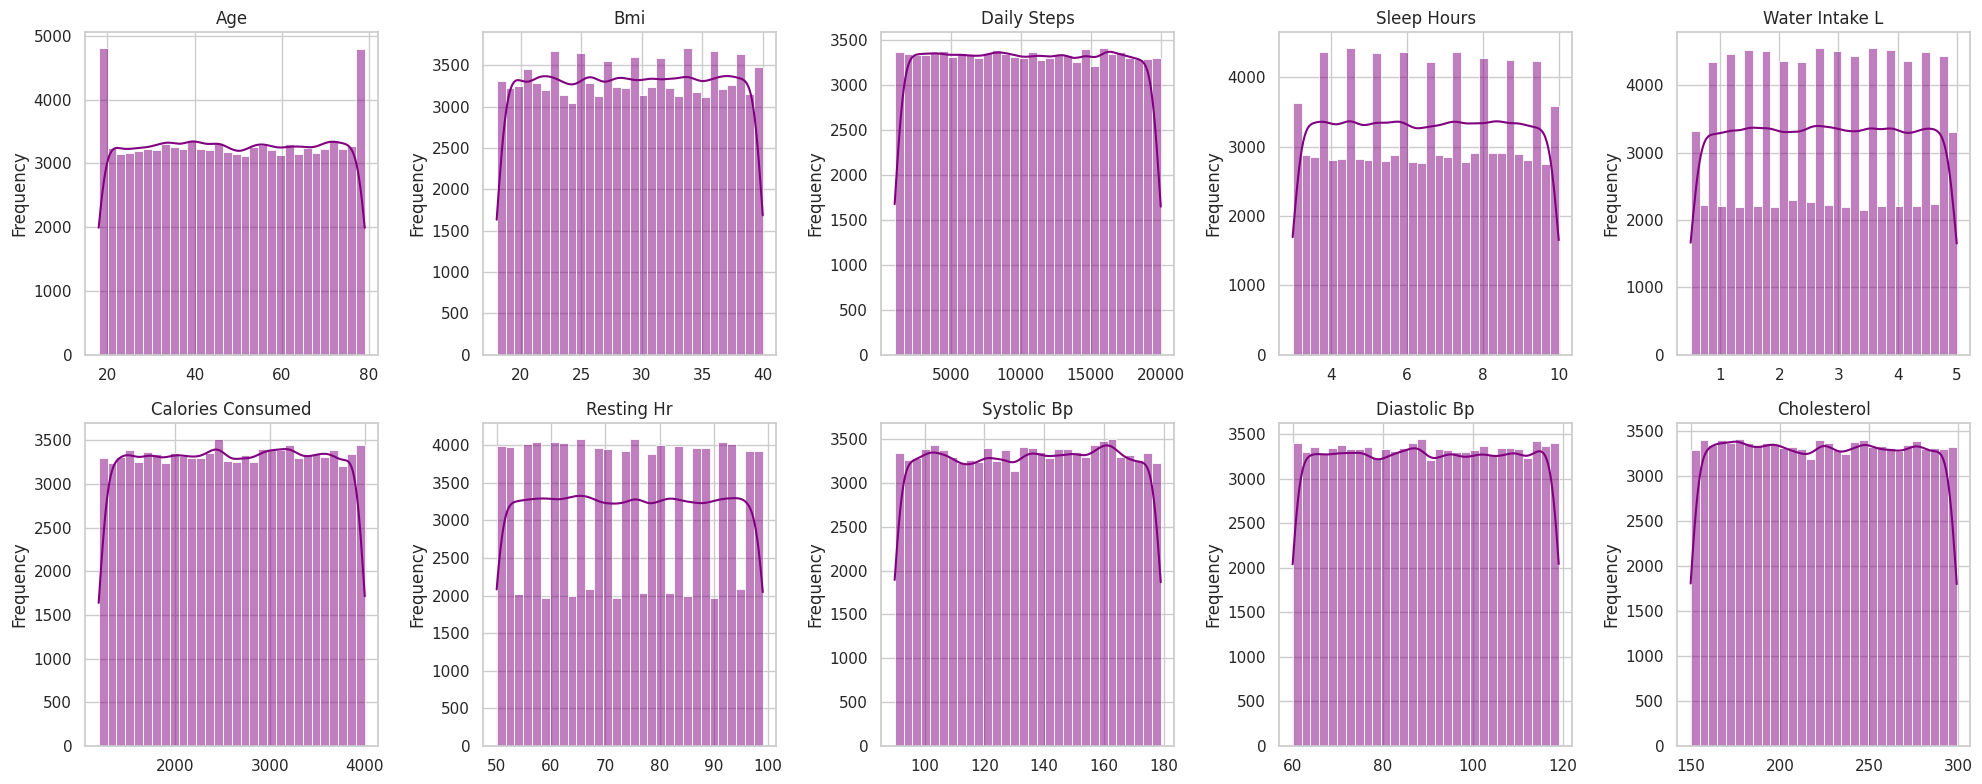

In [55]:
sns.set(style="whitegrid")

numeric_features = ['age', 'bmi', 'daily_steps', 'sleep_hours','water_intake_l', 'calories_consumed','resting_hr', 'systolic_bp', 'diastolic_bp', 'cholesterol']

fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()
for i, col in enumerate(numeric_features):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i], color='purple')
    axes[i].set_title(col.replace('_', ' ').title())
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()


### Bivariant analysis

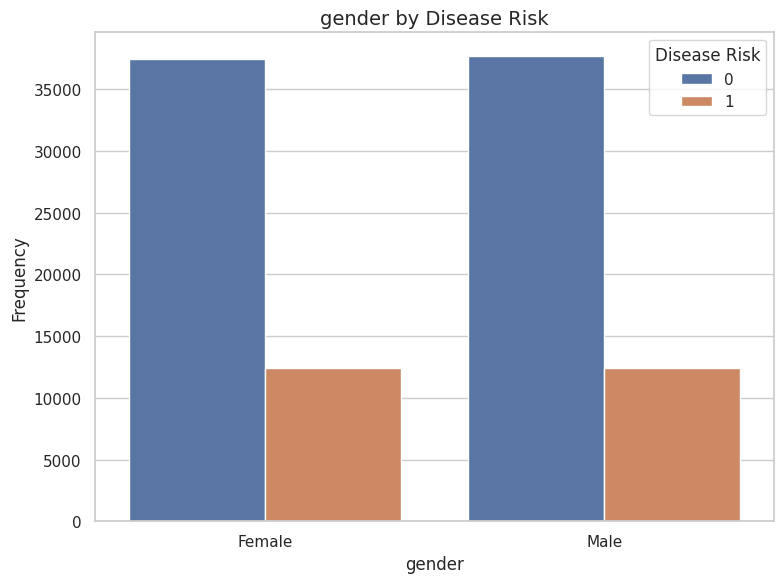

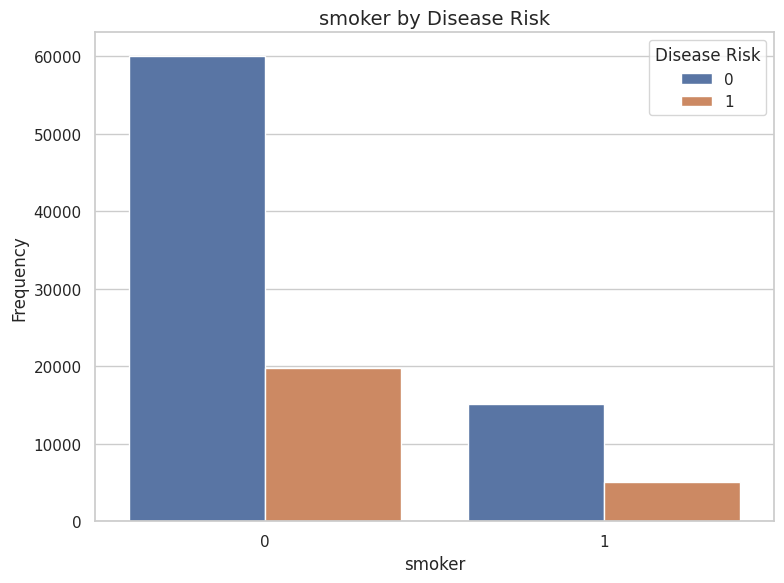

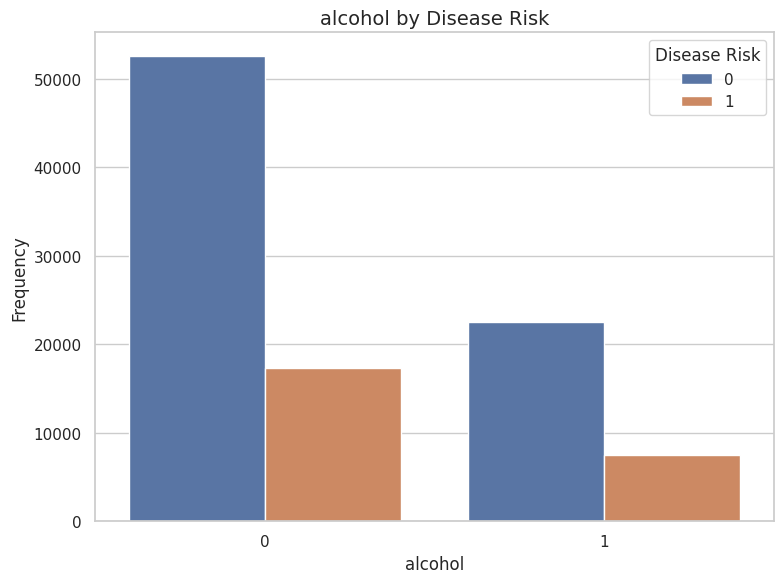

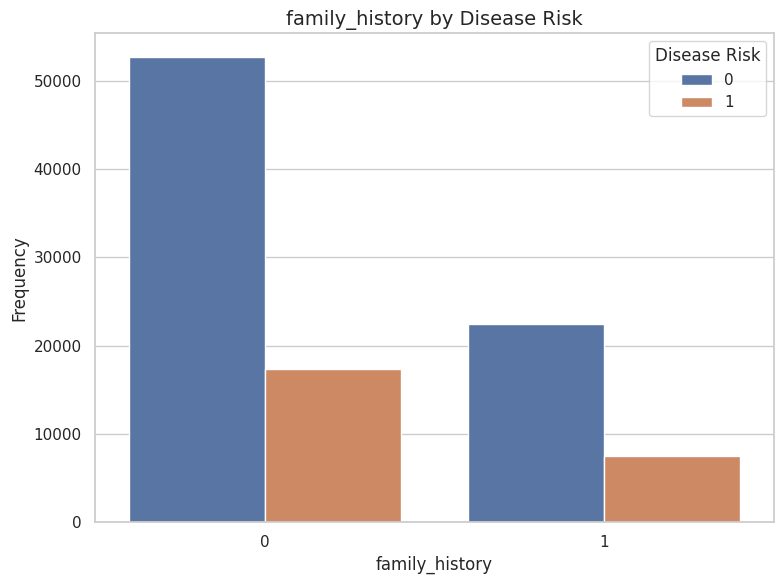

In [56]:
binary_features = ['gender', 'smoker', 'alcohol', 'family_history']

for feature in binary_features:
    grouped_counts = (df.groupby([feature, 'disease_risk']).size().reset_index(name='Count'))

    plt.figure(figsize=(8, 6))
    sns.barplot(data=grouped_counts,x=feature,y='Count',hue='disease_risk')

    plt.title(f'{feature} by Disease Risk', fontsize=14)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend(title='Disease Risk')
    plt.tight_layout()
    plt.show()


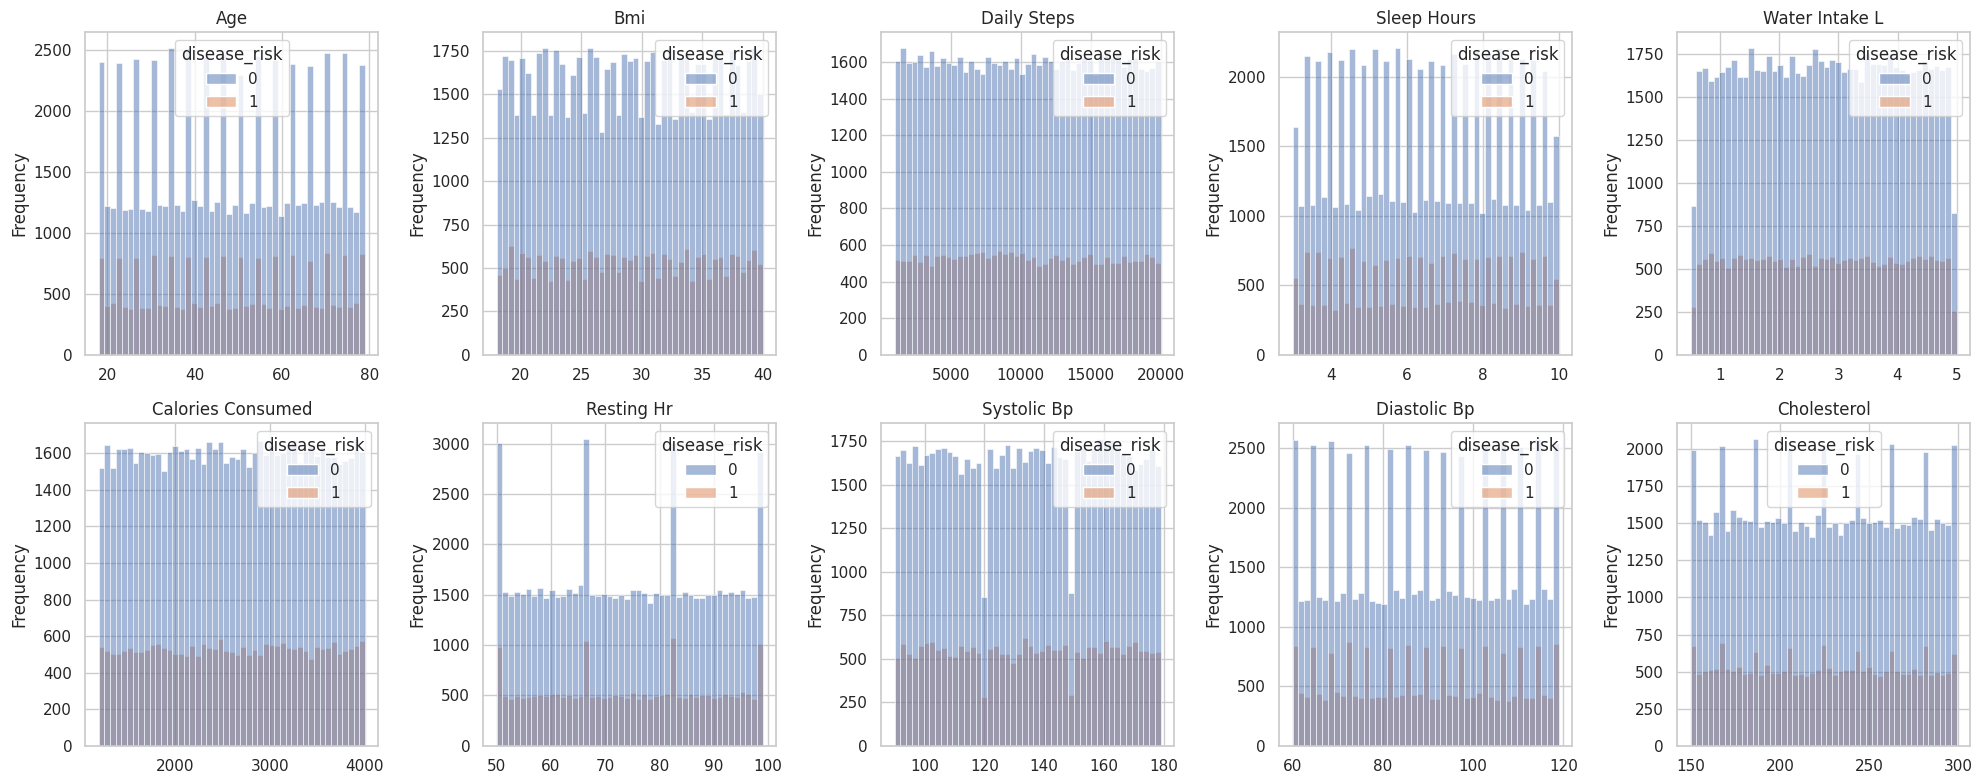

In [57]:
numeric_features = ['age', 'bmi', 'daily_steps', 'sleep_hours','water_intake_l', 'calories_consumed','resting_hr', 'systolic_bp', 'diastolic_bp', 'cholesterol']

fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()
for i, col in enumerate(numeric_features):
    sns.histplot(data=df,x=col, ax=axes[i],hue='disease_risk')
    axes[i].set_title(col.replace('_', ' ').title())
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

### Features Correlation

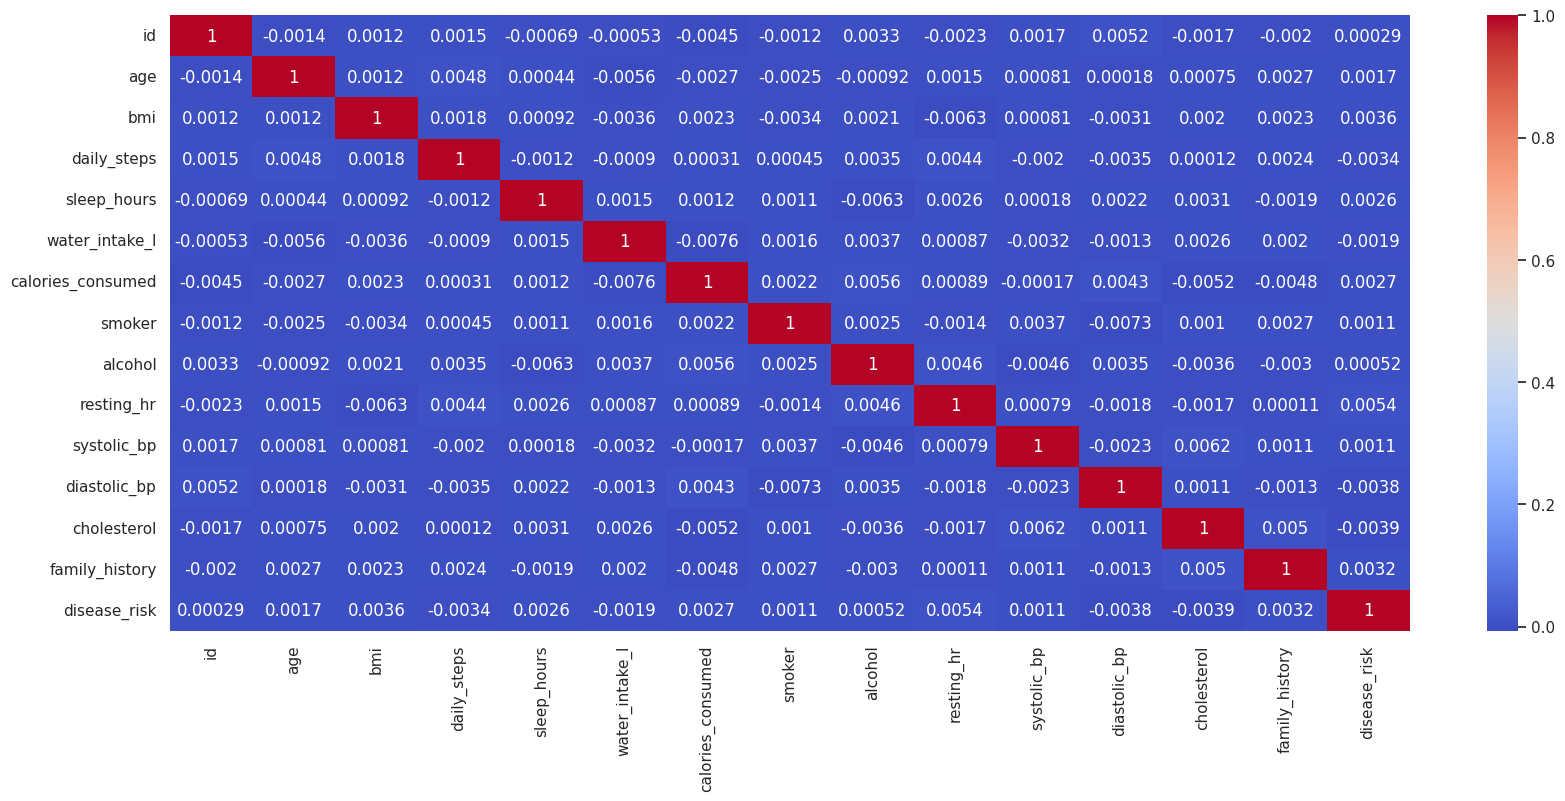

In [58]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.show()

This heatmap shows **near-zero correlation for EVERY feature with the target (disease_risk)**.

* Most correlations = **0.00** to **0.003**
* Even theoretically strong features (age, bmi, smoker, cholesterol) have correlations ≈ **0.00**
* No feature has even **0.1** correlation (which is extremely low)

📌 **Conclusion:**
The features **do not predict disease_risk in the dataset** — at least not linearly or in any simple form.

---

### 🧠 **Interpretation: This is a Data Quality Problem, which will affect later the model**


In [59]:
# Let’s Validate This finding
from sklearn.feature_selection import mutual_info_classif

# encode gender column
df['gender_male']=pd.get_dummies(df['gender'],drop_first=True) #-> replace label encoder to one hot encoded
df.drop(['gender'],axis=1,inplace=True)

X=df.drop(['id','disease_risk'],axis=1)
y=df['disease_risk']
mi = mutual_info_classif(X, y)
pd.Series(mi, index=X.columns).sort_values(ascending=False)


,0
gender_male,0.010914
alcohol,0.005282
family_history,0.003699
calories_consumed,0.002313
water_intake_l,0.001767
smoker,0.001105
daily_steps,0.001051
age,0.001048
bmi,0.000405
cholesterol,0.000268


All mutual information values are also near 0, then this dataset truly lacks signal.

### Modelling

In [60]:
df.columns

Index(['id', 'age', 'bmi', 'daily_steps', 'sleep_hours', 'water_intake_l',
       'calories_consumed', 'smoker', 'alcohol', 'resting_hr', 'systolic_bp',
       'diastolic_bp', 'cholesterol', 'family_history', 'disease_risk',
       'gender_male'],
      dtype='object')

In [61]:
# splitting
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [62]:
y_train.value_counts(normalize=True)

,proportion
disease_risk,
0,0.751713
1,0.248287


there is imbalance in target column which will be handled in the modelling phase

**Logistic Regression model**

Avergae f1 score in cv: 0.3349285738209164
Test score: 0.32722371967654984
Accuracy: 0.5008
Precision: 0.24569925116373204
Recall: 0.48971359419120614
F1 Score: 0.32722371967654984
ROC AUC Score: 0.49404642662773623


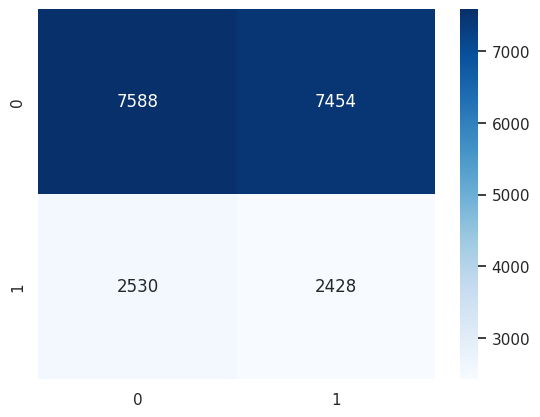

In [63]:
# logistic regression model

# apply pipeline with scaling and regularization for preventing overfitting
pipe=Pipeline([('scaler',StandardScaler()),('classifier',LogisticRegression(penalty='l2',solver='liblinear',C=1.0,class_weight='balanced'))])

# apply cross validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipe, X_train, y_train, cv=cv, scoring='f1')
print('Avergae f1 score in cv:',scores.mean())

# train final model
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
test_score=f1_score(y_test,y_pred)
print('Test score:',test_score)

# evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, pipe.predict_proba(X_test)[:, 1]))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='Blues')
plt.show()

pipline -> to avoid data leakeage

handle scaling into the pipeline and on traning set only to avoid data leakage and overfitting

Penality='l2' -> regularization method

solver='liblinear -> good for small to medium size datasets

c=1.0 -> stength for regularization (lower = strong regularization)


<Figure size 800x600 with 0 Axes>

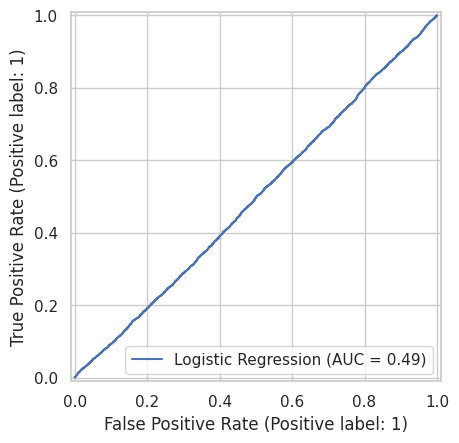

In [64]:
# Implement ROC CURVE
logistic_pred_proba = pipe.predict_proba(X_test)[:, 1]

plt.figure(figsize=(8,6))
RocCurveDisplay.from_estimator(pipe, X_test, y_test, name='Logistic Regression')
plt.show()

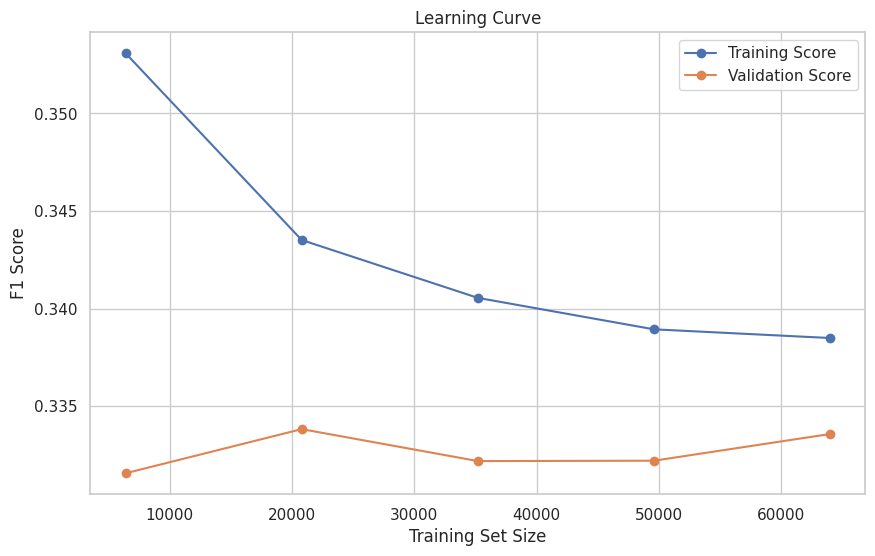

In [65]:
# plot learning curve for logistic regression
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, val_scores = learning_curve(pipe, X_train, y_train, cv=5, scoring='f1')
train_scores_mean=np.mean(train_scores,axis=1)
train_scores_std=np.std(train_scores,axis=1)
val_scores_mean=np.mean(val_scores,axis=1)
val_scores_std=np.std(val_scores,axis=1)

plt.figure(figsize=(10,6))
plt.plot(train_sizes,train_scores_mean,'o-',label='Training Score')
plt.plot(train_sizes,val_scores_mean,'o-',label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('F1 Score')
plt.title('Learning Curve')
plt.legend()
plt.show()

**Random Forest Model**

Avergae f1 score in cv: 0.24694663246815182
Test score: 0.2452245224522452
Accuracy: 0.62265
Precision: 0.24320571315215236
Recall: 0.2472771278741428
F1 Score: 0.2452245224522452
ROC AUC Score: 0.4950417035876258


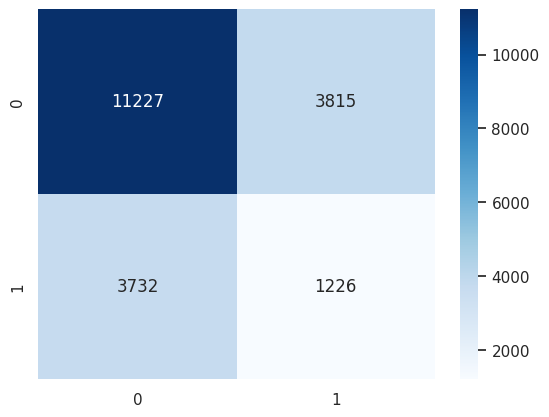

In [66]:
# random forest

# apply random forest classifier
rf_model=RandomForestClassifier(n_estimators=150,max_depth=10,
                                min_samples_split=10,min_samples_leaf=5,
                                class_weight='balanced',max_features='sqrt',
                                random_state=42,n_jobs=-1)

# apply pipline for preventing overfitting and minimize outliers effect using standard scaler
rf_pipe=Pipeline([('scaler',StandardScaler()),('classifier',rf_model)])

# apply cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf_scores = cross_val_score(rf_pipe, X_train, y_train, cv=cv, scoring='f1')
print('Avergae f1 score in cv:',rf_scores.mean())

# train final model
rf_pipe.fit(X_train, y_train)
rf_pred = rf_pipe.predict(X_test)
test_score=f1_score(y_test,rf_pred)
print('Test score:',test_score)

# evaluation metrics
print('Accuracy:', accuracy_score(y_test, rf_pred))
print('Precision:', precision_score(y_test, rf_pred))
print('Recall:', recall_score(y_test, rf_pred))
print('F1 Score:', f1_score(y_test, rf_pred))
print('ROC AUC Score:', roc_auc_score(y_test, rf_pipe.predict_proba(X_test)[:, 1]))
sns.heatmap(confusion_matrix(y_test,rf_pred),annot=True,fmt='d',cmap='Blues')
plt.show()

    n_estimators=200,            -> number of trees (too high → slower, too low → underfit)
    max_depth=10,                -> controls overfitting (None = full depth = high overfit risk)
    min_samples_split=10,        -> min samples to split an internal node
    min_samples_leaf=5,          -> min samples per leaf node
    max_features='sqrt',         -> limit features per split
    class_weight='balanced',     -> handle class imbalance
    random_state=42,
    n_jobs=-1                    -> use all cores

<Figure size 800x600 with 0 Axes>

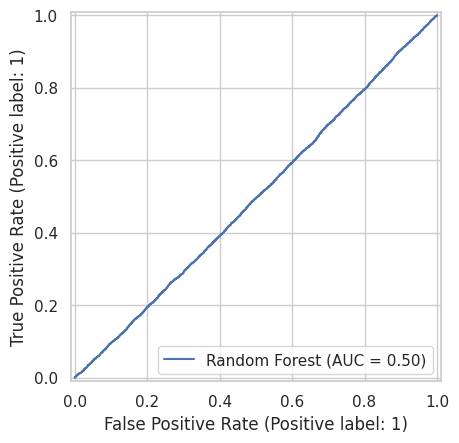

In [67]:
# plot roc curve for random forest
rf_pred_proba = rf_pipe.predict_proba(X_test)[:, 1]

plt.figure(figsize=(8,6))
RocCurveDisplay.from_estimator(rf_pipe, X_test, y_test, name='Random Forest')
plt.show()

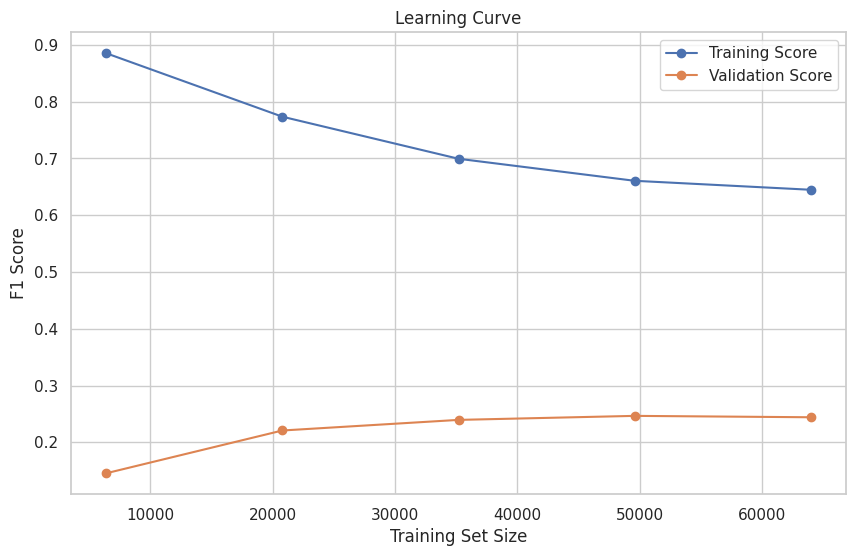

In [68]:
# plot learning curve for random forest
train_sizes, train_scores, val_scores = learning_curve(rf_pipe, X_train, y_train, cv=5, scoring='f1')
train_scores_mean=np.mean(train_scores,axis=1)
train_scores_std=np.std(train_scores,axis=1)
val_scores_mean=np.mean(val_scores,axis=1)
val_scores_std=np.std(val_scores,axis=1)

plt.figure(figsize=(10,6))
plt.plot(train_sizes,train_scores_mean,'o-',label='Training Score')
plt.plot(train_sizes,val_scores_mean,'o-',label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('F1 Score')
plt.title('Learning Curve')
plt.legend()
plt.show()

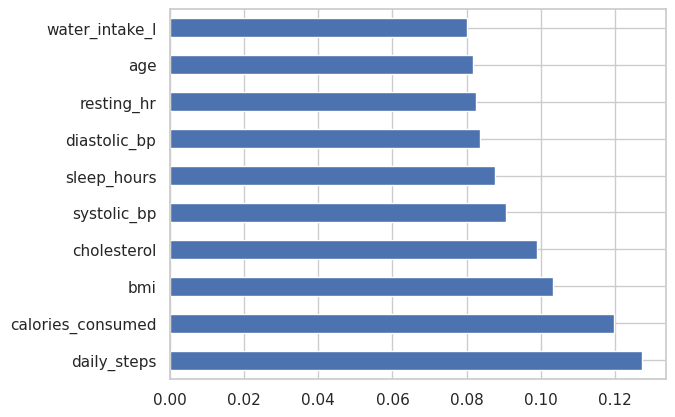

In [69]:
feat_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.show()


**XGBOOST Model**

average f1 score in cv: 0.3111755027578046
Test score: 0.31067669172932333
Accuracy: 0.5416
Precision: 0.24766243107168545
Recall: 0.41670028237192414
F1 Score: 0.31067669172932333
ROC AUC Score: 0.4998897131329306


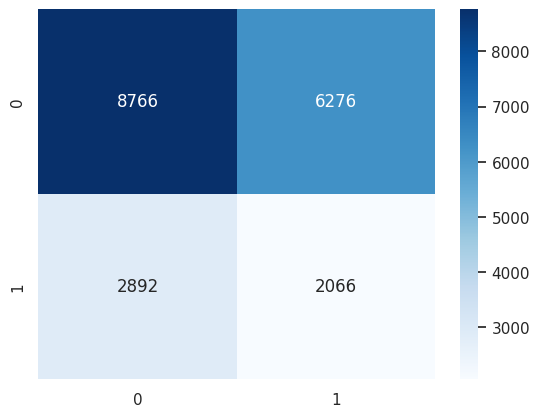

In [70]:
# apply xgboost model
xgb_model = XGBClassifier(n_estimators=300,learning_rate=0.05,max_depth=5,min_child_weight=5,
    subsample=0.8,colsample_bytree=0.8,gamma=0.2,reg_lambda=1.0,reg_alpha=0.5,
    scale_pos_weight=(len(y_train)-sum(y_train))/sum(y_train),random_state=42,
    n_jobs=-1,use_label_encoder=False,eval_metric='logloss'
)

# apply pipeline to avoid overfitting
xg_pipe=Pipeline([('scaler',StandardScaler()),('classifier',xgb_model)])

# cross validation step
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
xg_scores = cross_val_score(xg_pipe, X_train, y_train, cv=cv, scoring='f1')
print('average f1 score in cv:',xg_scores.mean())

# train final model
xg_pipe.fit(X_train, y_train)
xg_pred = xg_pipe.predict(X_test)
test_score=f1_score(y_test,xg_pred)
print('Test score:',test_score)

# evaluation metrics
print('Accuracy:', accuracy_score(y_test, xg_pred))
print('Precision:', precision_score(y_test, xg_pred))
print('Recall:', recall_score(y_test, xg_pred))
print('F1 Score:', f1_score(y_test,xg_pred))
print('ROC AUC Score:', roc_auc_score(y_test, xg_pipe.predict_proba(X_test)[:, 1]))

sns.heatmap(confusion_matrix(y_test,xg_pred),annot=True,fmt='d',cmap='Blues')
plt.show()


    n_estimators=300,            -> number of boosting rounds
    learning_rate=0.05,          -> smaller → slower but more generalizable
    max_depth=5,                 -> control tree depth
    min_child_weight=5,          -> prevent overfitting on small leaves
    subsample=0.8,               -> use 80% of rows per tree
    colsample_bytree=0.8,        -> use 80% of features per tree
    gamma=0.2,                   -> minimum loss reduction for a split
    reg_lambda=1.0,              -> L2 regularization
    reg_alpha=0.5,               -> L1 regularization
    scale_pos_weight=(len(y_train)-sum(y_train))/sum(y_train),  -> handle imbalance

<Figure size 800x600 with 0 Axes>

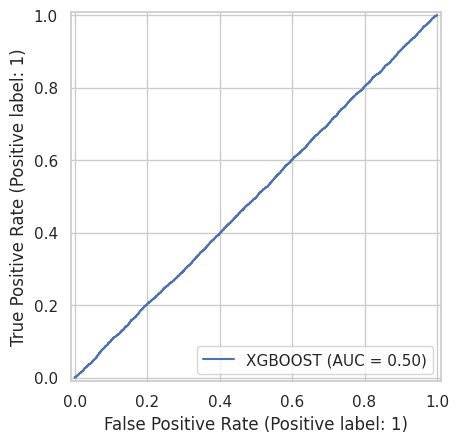

In [71]:
# plot roc curve for xgboost
xg_pred_proba = xg_pipe.predict_proba(X_test)[:, 1]

plt.figure(figsize=(8,6))
RocCurveDisplay.from_estimator(xg_pipe, X_test, y_test, name='XGBOOST')
plt.show()

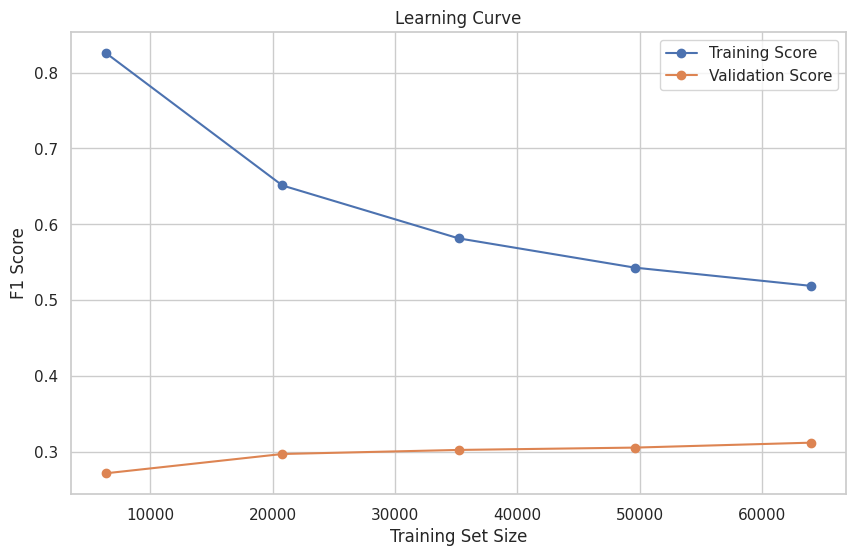

In [72]:
# plot learning curve for xgboost
train_sizes, train_scores, val_scores = learning_curve(xg_pipe, X_train, y_train, cv=5, scoring='f1')
train_scores_mean=np.mean(train_scores,axis=1)
train_scores_std=np.std(train_scores,axis=1)
val_scores_mean=np.mean(val_scores,axis=1)
val_scores_std=np.std(val_scores,axis=1)

plt.figure(figsize=(10,6))
plt.plot(train_sizes,train_scores_mean,'o-',label='Training Score')
plt.plot(train_sizes,val_scores_mean,'o-',label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('F1 Score')
plt.title('Learning Curve')
plt.legend()
plt.show()

Best model: Random Forest

This poor performance due to the dataset itself as it lacks information